<a href="https://colab.research.google.com/github/sharvani1357/Ridge-lasso-naive_bayes/blob/main/regularization(ridge%2Classo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
x=np.array([1,2,3,4,5,6]).reshape(-1,1)
y=np.array([35,40,50,60,65,70])

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
y_train_pred=lin_reg.predict(x_train)
y_test_pred=lin_reg.predict(x_test)

In [9]:
print("good fit(linear regression)")
print("mean squared error(train):",mean_squared_error(y_train,y_train_pred))
print("train r2:",r2_score(y_train,y_train_pred))

good fit(linear regression)
mean squared error(train): 1.875
train r2: 0.9657142857142857


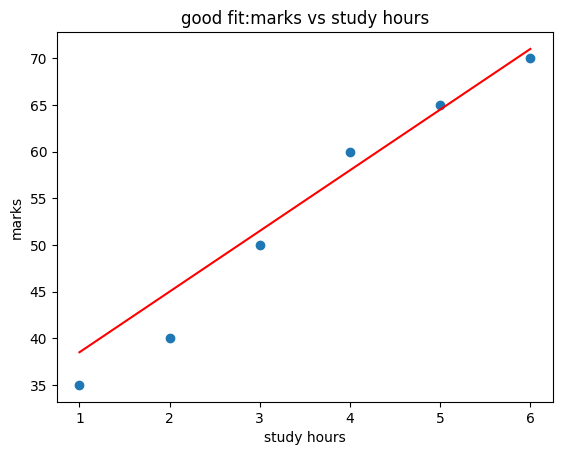

In [10]:
plt.scatter(x,y)
plt.plot(x,lin_reg.predict(x),color='red')
plt.title("good fit:marks vs study hours")
plt.xlabel("study hours")
plt.ylabel("marks")
plt.show()

In [12]:
poly=PolynomialFeatures(degree=5)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)
overfit_model=LinearRegression()
overfit_model.fit(x_train_poly,y_train)
y_train_pred_poly=overfit_model.predict(x_train_poly)
y_test_pred_poly=overfit_model.predict(x_test_poly)

In [13]:
print("overfit model")
print("mean squared error(train):",mean_squared_error(y_train,y_train_pred_poly))
print("train r2:",r2_score(y_train,y_train_pred_poly))

overfit model
mean squared error(train): 8.363894592162157e-24
train r2: 1.0


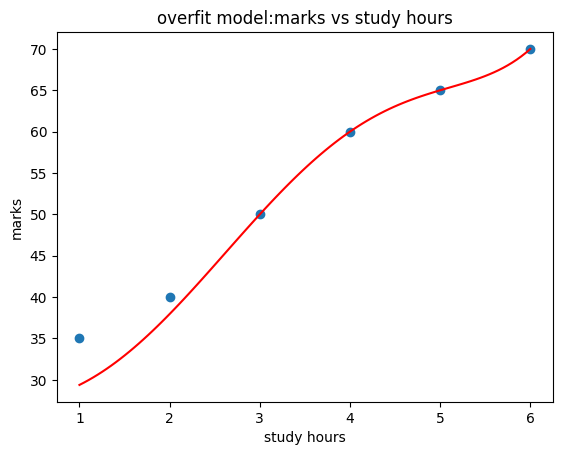

In [14]:
x_grid=np.linspace(1,6,100).reshape(-1,1)
x_grid_poly=poly.fit_transform(x_grid)
plt.scatter(x,y)
plt.plot(x_grid,overfit_model.predict(x_grid_poly),color='red')
plt.title("overfit model:marks vs study hours")
plt.xlabel("study hours")
plt.ylabel("marks")
plt.show()

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=5)
x_poly=poly.fit_transform(x)

In [16]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1)
ridge.fit(x_poly,y)
y_ridge_pred=ridge.predict(x_poly)

In [17]:
from sklearn.metrics import mean_squared_error,r2_score
print("ridge mse:",mean_squared_error(y,y_ridge_pred))
print("ridge r2:",r2_score(y,y_ridge_pred))

ridge mse: 0.24058058055628095
ridge r2: 0.9985320506949108


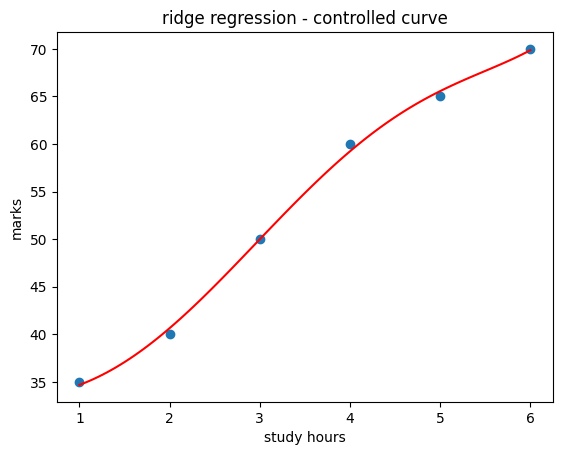

In [18]:
x_grid=np.linspace(1,6,100).reshape(-1,1)
x_grid_poly=poly.fit_transform(x_grid)
plt.scatter(x,y)
plt.plot(x_grid,ridge.predict(x_grid_poly),color='red')
plt.title("ridge regression - controlled curve")
plt.xlabel("study hours")
plt.ylabel("marks")
plt.show()

In [19]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
lasso.fit(x_poly,y)
y_lasso_pred=lasso.predict(x_poly)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.580e+00, tolerance: 9.833e-02
  model = cd_fast.enet_coordinate_descent(


In [20]:
from sklearn.metrics import mean_squared_error,r2_score
print("lasso mse:",mean_squared_error(y,y_lasso_pred))
print("lasso r2:",r2_score(y,y_lasso_pred))
print("ridge mse:",mean_squared_error(y,y_ridge_pred))
print("ridge r2:",r2_score(y,y_ridge_pred))

lasso mse: 0.7727384155729786
lasso r2: 0.9952849859388767
ridge mse: 0.24058058055628095
ridge r2: 0.9985320506949108


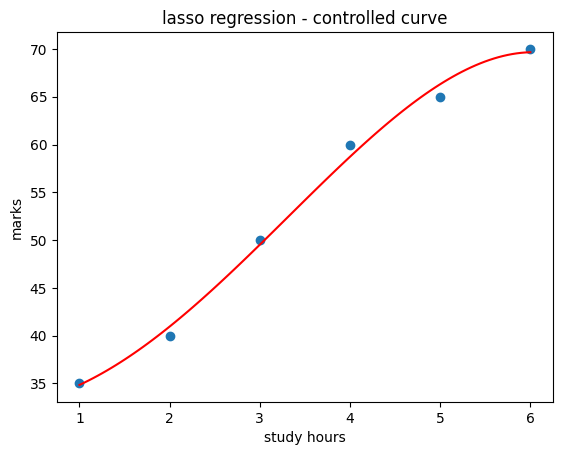

In [21]:
plt.scatter(x,y)
plt.plot(x_grid,lasso.predict(x_grid_poly),color='red')
plt.title("lasso regression - controlled curve")
plt.xlabel("study hours")
plt.ylabel("marks")
plt.show()